In [8]:
#Bonus 
#As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. 
#You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. 
#To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:

#Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) 
#This step may require some research. Feel free to use the code below to get started. 
#Be sure to make any necessary modifications for your username, password, host, port, and database name:

#Consult SQLAlchemy documentation for more information.


#If using a password, do not upload your password to your GitHub repository. See https://www.youtube.com/watch?v=2uaTPmNvH0I and https://help.github.com/en/github/using-git/ignoring-files for more information.

In [17]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from config import postgresql_url

In [18]:
engine = create_engine(postgresql_url)
conn = engine.connect()

In [28]:
merged_data = pd.read_sql(
    'SELECT * FROM employees e\
    LEFT JOIN salaries s ON e.emp_no = s.emp_no\
    LEFT JOIN titles t on e.emp_title_id = t.title_id', conn)

merged_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,emp_no,salary,title_id,title
0,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,78228,s0001,Staff
1,10010,e0002,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,10010,72488,e0002,Engineer
2,10011,s0001,1953-11-07,Mary,Sluis,F,1990-01-22,10011,42365,s0001,Staff
3,10013,s0002,1963-06-07,Eberhardt,Terkki,M,1985-10-20,10013,40000,s0002,Senior Staff
4,10017,s0001,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,10017,71380,s0001,Staff


Text(0.5, 1.0, 'Salary')

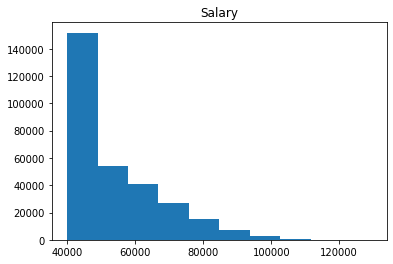

In [33]:
#Create a histogram to visualize the most common salary ranges for employees.
plt.hist(merged_data['salary'])
plt.title('Salary')

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

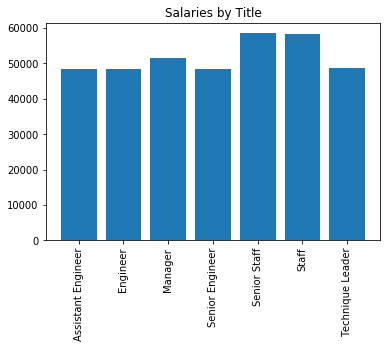

In [34]:
#Create a bar chart of average salary by title.
average_salary = merged_data[['title', 'salary']].groupby('title').mean().reset_index()
plt.bar(average_salary['title'], average_salary['salary'])
plt.title('Salaries by Title')
plt.xticks(rotation=90)
